In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
import plotly.graph_objs as go
from plotly.offline import iplot
#import shap

########################################
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor'  : '#212946',
    'axes.facecolor'    : '#212946',
    'savefig.facecolor' : '#212946',
    'axes.grid'         : True,
    'axes.grid.which'   : 'both',
    'axes.spines.left'  : False,
    'axes.spines.right' : False,
    'axes.spines.top'   : False,
    'axes.spines.bottom': False,
    'grid.color'        : '#2A3459',
    'grid.linewidth'    : '1',
    'text.color'        : '0.9',
    'axes.labelcolor'   : '0.9',
    'xtick.color'       : '0.9',
    'ytick.color'       : '0.9',
    'font.size'         : 12
}
plt.rcParams.update(dark_style)

import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [35]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/50_Startups.csv'

In [20]:
df=pd.read_csv(url,sep=',')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
df.shape

(50, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# **Data Preprocesing**

**Cat_Vars**

In [38]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

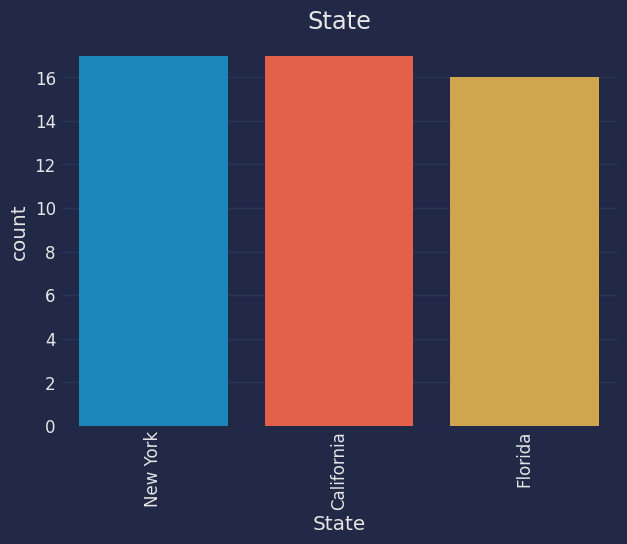

In [24]:
sns.countplot(data=df,x='State')
plt.title('State')
plt.xticks(rotation=90)
plt.show()

In [25]:
#Pie chart 
pie=go.Figure(data=[go.Pie(labels=df['State'].value_counts().keys(), values=df['State'].value_counts().values)])
pie.update_layout(title='Distribucion de Estado')
iplot(pie)

In [39]:
df.select_dtypes(include='number').columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

**num_vars**

In [40]:
num_vars=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

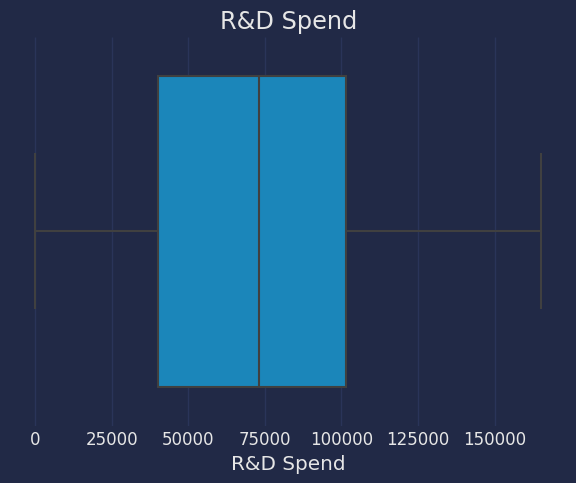

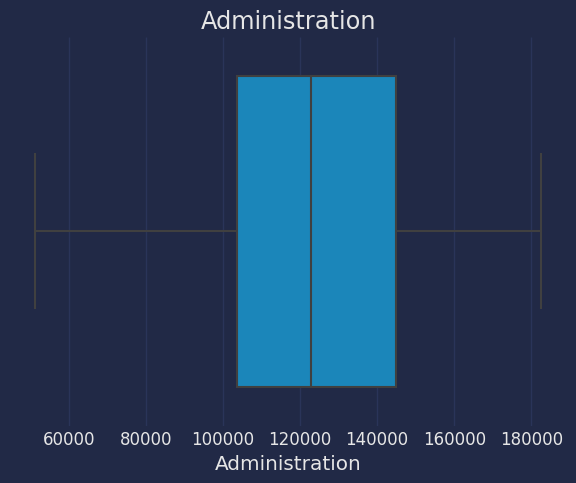

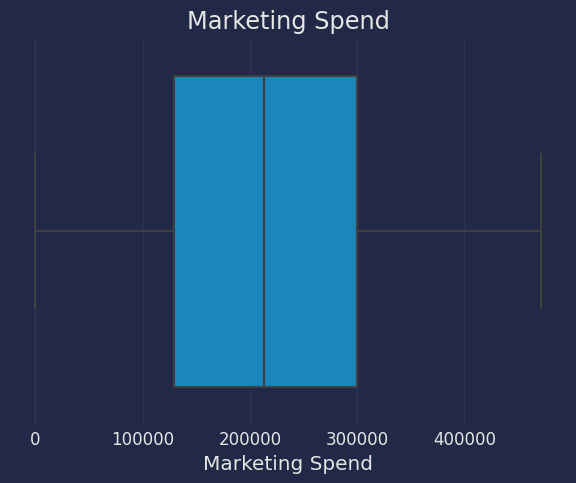

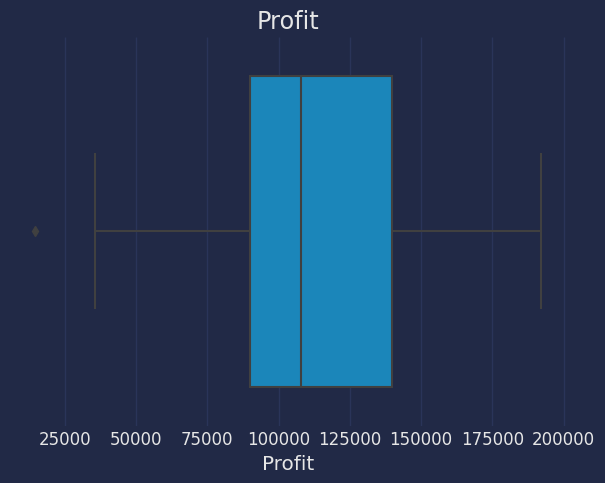

In [28]:
for i in num_vars:
  sns.boxplot(x=i,data=df)
  plt.title(i)
  plt.show()
  print('')

In [29]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

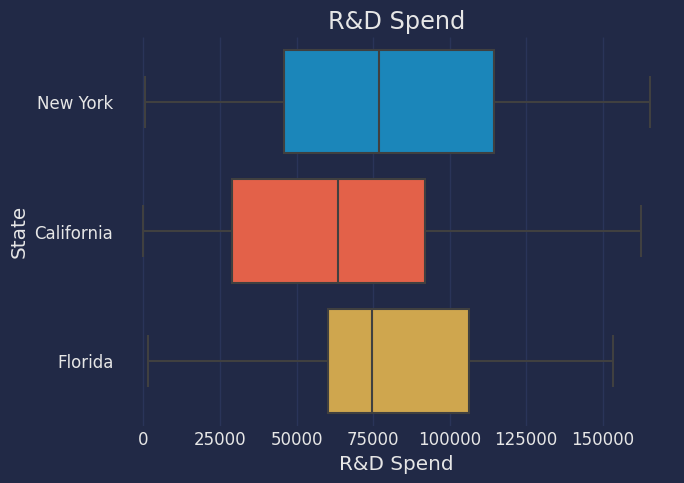

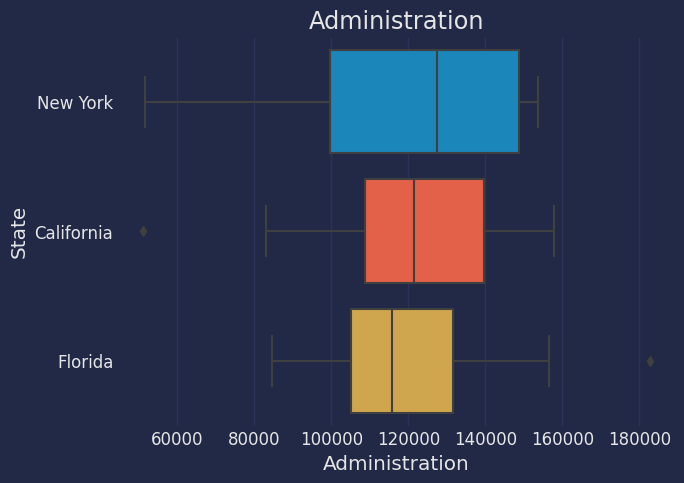

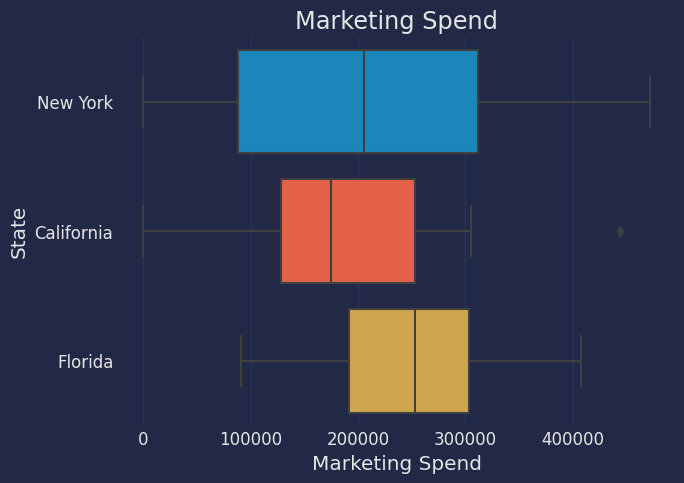

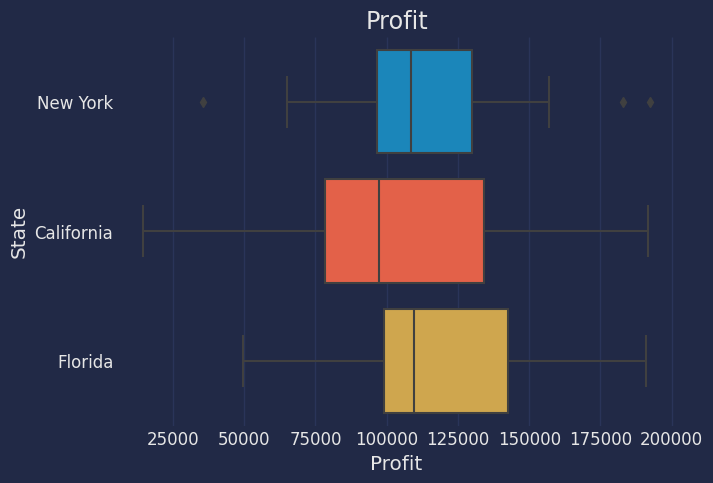

In [30]:
for i  in num_vars:
  sns.boxplot(x=i,data=df,y='State')
  plt.title(i)
  plt.show()
  print('')

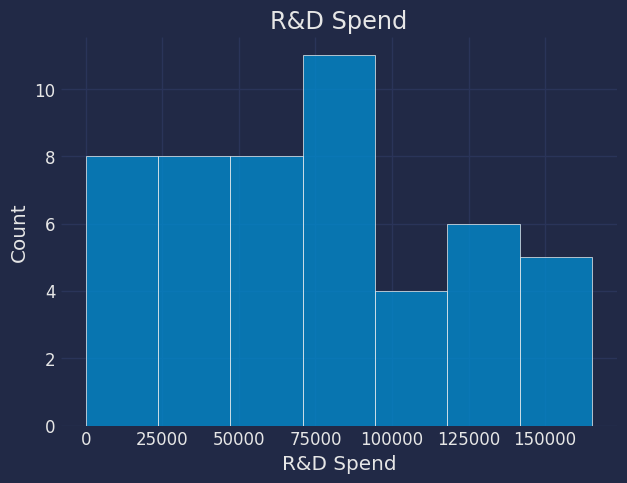

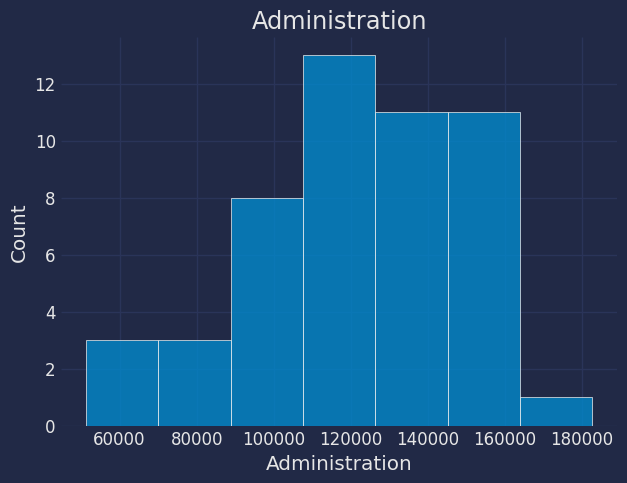

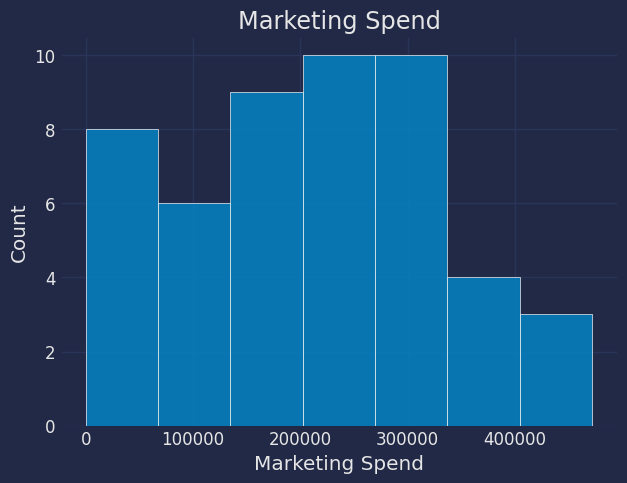

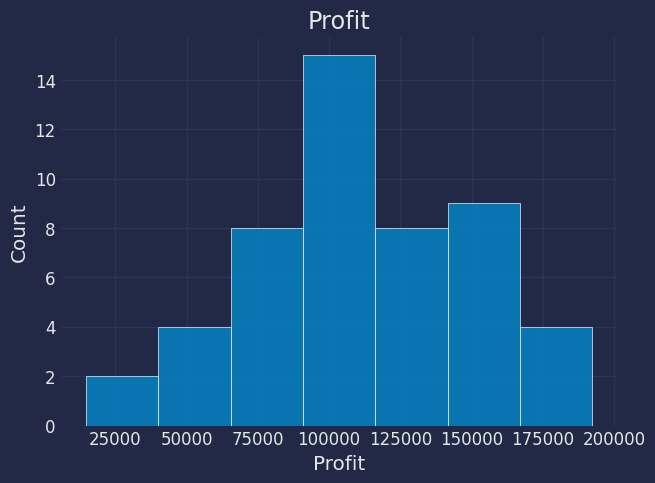

In [31]:
for i in num_vars:
  sns.histplot(x=i,data=df)
  plt.title(i)
  plt.show()
  print('')

In [32]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


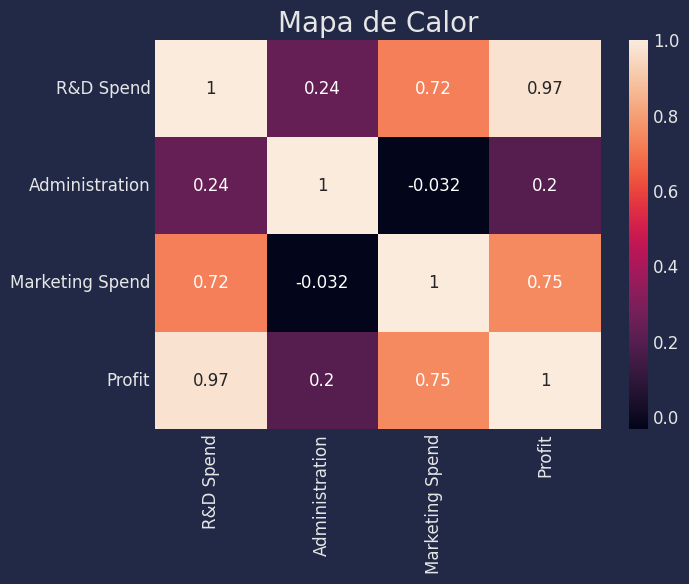

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=20)
plt.show()

**Relacion entre variables**

In [41]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,R&D Spend,Profit,0.972900,0.972900
12,Profit,R&D Spend,0.972900,0.972900
11,Marketing Spend,Profit,0.747766,0.747766
14,Profit,Marketing Spend,0.747766,0.747766
2,R&D Spend,Marketing Spend,0.724248,0.724248
8,Marketing Spend,R&D Spend,0.724248,0.724248
1,R&D Spend,Administration,0.241955,0.241955
4,Administration,R&D Spend,0.241955,0.241955
7,Administration,Profit,0.200717,0.200717
13,Profit,Administration,0.200717,0.200717


In [42]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

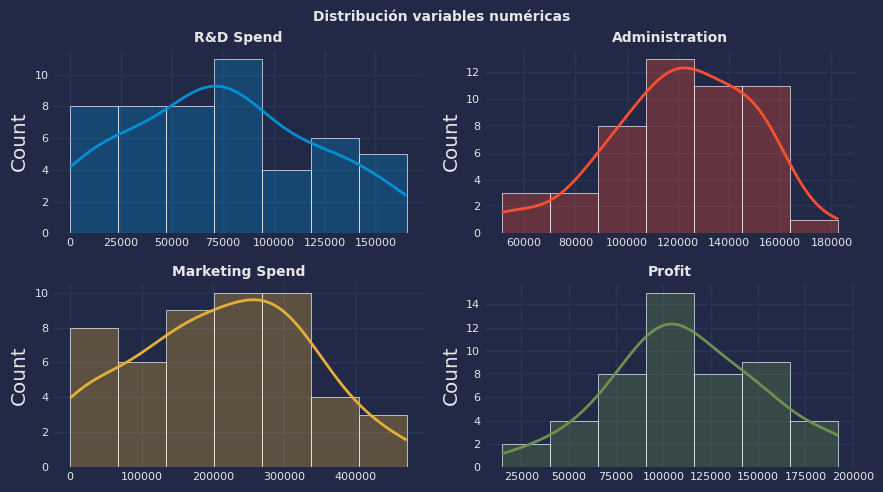

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# **DUMIES**

In [44]:
X=df.drop('Profit',axis=1)
y=df['Profit']

In [45]:
X=pd.get_dummies(X,drop_first=True)

In [46]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


# **Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# **Model Regression Lineal**

* En la regresión múltiple, el p-value se utiliza como medida de la significancia estadística de cada variable independiente en el modelo. Un p-value bajo (generalmente por debajo de un umbral predefinido, como 0.05) indica que la variable es estadísticamente significativa y contribuye de manera significativa al modelo. 

* Por otro lado, un p-value alto (mayor que el umbral) indica que la variable no es estadísticamente significativa y su contribución al modelo es insignificante.

In [48]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.47e-23
Time:                        21:19:47   Log-Likelihood:                -411.89
No. Observations:                  40   AIC:                             835.8
Df Residuals:                      34   BIC:                             845.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.567e+04   6512.879     

In [49]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,42431.547340,68903.072867
R&D Spend,0.736859,0.917121
Administration,-0.156764,0.047348
Marketing Spend,-0.010736,0.051886
State_Florida,-8984.666400,3575.403270
State_New York,-10120.870578,2478.159546


**Diagnostico de los Residuos**

In [50]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

In [51]:
# Configuración matplotlib
# ==============================================================================
from matplotlib import style
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


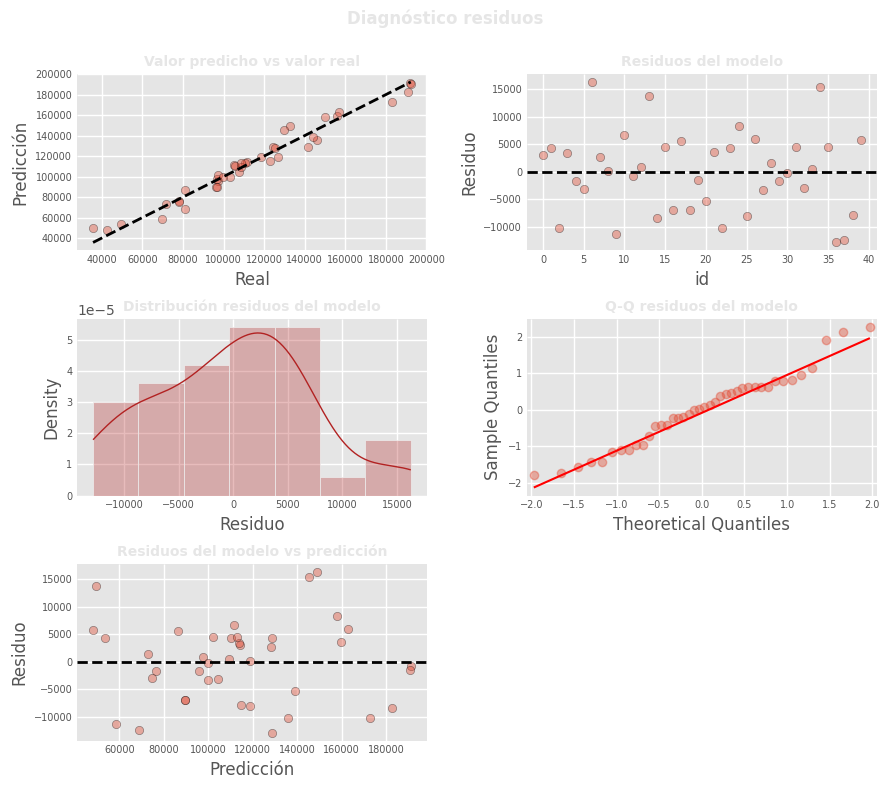

In [52]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## **Test de Normalidad**

**Shapiro Test**

El resultado de la prueba de Shapiro que proporcionas tiene dos componentes: el estadístico de prueba y el valor p.

* El estadístico de prueba (statistic) es un número que indica la magnitud de la desviación de los datos de la distribución normal. En tu caso, el valor del estadístico es 0.9679467678070068.

* El valor p (p-value) es la probabilidad de obtener un estadístico de prueba igual o más extremo que el observado, asumiendo que la hipótesis nula es verdadera (es decir, que los datos siguen una distribución normal). En tu caso, el valor p es 0.3092394769191742.

In [53]:
shapiro_test=stats.shapiro(residuos_train)
print(shapiro_test)

ShapiroResult(statistic=0.9679467678070068, pvalue=0.3092394769191742)


* Para interpretar los resultados, se comparará el valor p con un umbral de significancia predefinido (generalmente 0.05). Si el valor p es mayor que el umbral de significancia, no se rechaza la hipótesis nula y se concluye que los datos siguen una distribución normal. En tu caso, el valor p (0.3092394769191742) es mayor que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de normalidad. Por lo tanto, se puede inferir que los datos siguen una distribución normal.

* En resumen, el resultado de la prueba de Shapiro indica que no hay suficiente evidencia para concluir que los datos no siguen una distribución normal.

**Normalidad de los residuos D'Agostino's K-squared test**

* Basado en los resultados de la prueba de normalidad de los residuos D'Agostino's K-squared test que mencionas, podemos inferir lo siguiente:

* Estadístico: El valor del estadístico obtenido es 0.23979104160732861. Este valor es utilizado en la prueba para determinar si los residuos siguen una distribución normal. En este caso, un valor cercano a cero indica que los residuos están más cerca de una distribución normal.

* P-value: El valor del p-value obtenido es 0.8870131062925365. El p-value es una medida de la evidencia en contra de la hipótesis nula de que los residuos siguen una distribución normal. Un valor alto de p-value indica que no hay suficiente evidencia para rechazar la hipótesis nula y concluir que los residuos no siguen una distribución normal.

In [54]:
k2,p_value=stats.normaltest(residuos_train)
print(f"Estadistico={k2}, p-value= {p_value}")

Estadistico=0.23979104160732861, p-value= 0.8870131062925365


* En base a estos resultados, se puede inferir que los residuos de tu modelo se ajustan a una distribución normal, ya que el valor del estadístico es cercano a cero y el p-value es alto (mayor a 0.05). Esto implica que no hay suficiente evidencia para rechazar la hipótesis de normalidad de los residuos. En otras palabras, los residuos no muestran desviaciones significativas de una distribución normal y se ajustan bien al supuesto de normalidad en el modelo. Esto es deseable, ya que una distribución normal de los residuos es importante para realizar inferencias válidas y confiables sobre los parámetros del modelo.

# **Predicciones**

In [55]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
21,114427.680236,3248.235326,107826.471828,121028.888643,97289.283757,131566.076714
18,128659.934281,2202.139414,124184.648548,133135.220014,112222.876643,145096.991920
10,135908.352013,2565.770406,130694.079194,141122.624832,119254.904248,152561.799778
22,113679.009113,2373.741779,108854.985416,118503.032810,97143.596023,130214.422202
31,95866.141958,3014.198555,89740.553495,101991.730420,78905.260040,112827.023876
25,104348.235230,2533.347308,99199.854073,109496.616387,87715.300734,120981.169726
14,148867.848875,2746.803040,143285.673478,154450.024272,132095.569257,165640.128493
17,128003.503179,2584.881583,122750.391776,133256.614583,111337.854052,144669.152307
20,118644.036788,2534.422416,113493.470749,123794.602827,102010.425877,135277.647699
43,58431.269001,3030.092911,52273.379320,64589.158683,41458.694455,75403.843548


In [56]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 14230.784013522813


# **Conclusion** 

In [57]:
y_test_=y_test.flatten()

In [73]:
df=pd.DataFrame(data={'Predicted value':predicciones,'Actual Value':y_test_})
df.reset_index(drop=False, inplace=True)
df.rename(columns={'index': 'Nuevo Índice'}, inplace=True)
df['Nuevo Índice'] += 1
df = df.drop('Nuevo Índice', axis=1)
# Imprimir el DataFrame con el nuevo índice
df.head()

,Predicted value,Actual Value
0,93360.996544,89949.14
1,45920.088063,64926.08
2,161567.710948,156122.51
3,66121.864727,65200.33
4,129529.976303,134307.35


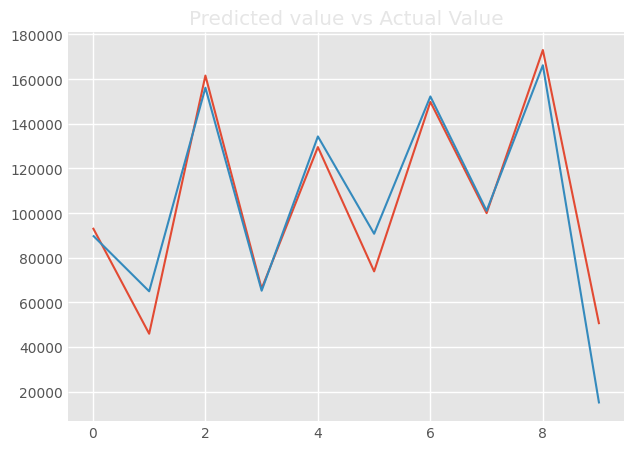

In [75]:
plt.plot(df)
plt.title('Predicted value vs Actual Value')
plt.show()

In [76]:
import plotly.express as px
fig = px.line(df, y=['Predicted value','Actual Value'], x=df.index, title='Actual Price vs Predicted Value')
fig.show()

In [77]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(y_test , predicciones))
print('Mean Squared Error       :', metrics.mean_squared_error(y_test , predicciones))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y_test , predicciones)))
print('R Square                 :', metrics.r2_score(y_test , predicciones))

Mean Absolute Error      : 9623.559548337154
Mean Squared Error       : 202515213.63953647
Root Mean Squared Error  : 14230.784013522813
R Square                 : 0.9045543891668558
